# CMYK CONVERSION

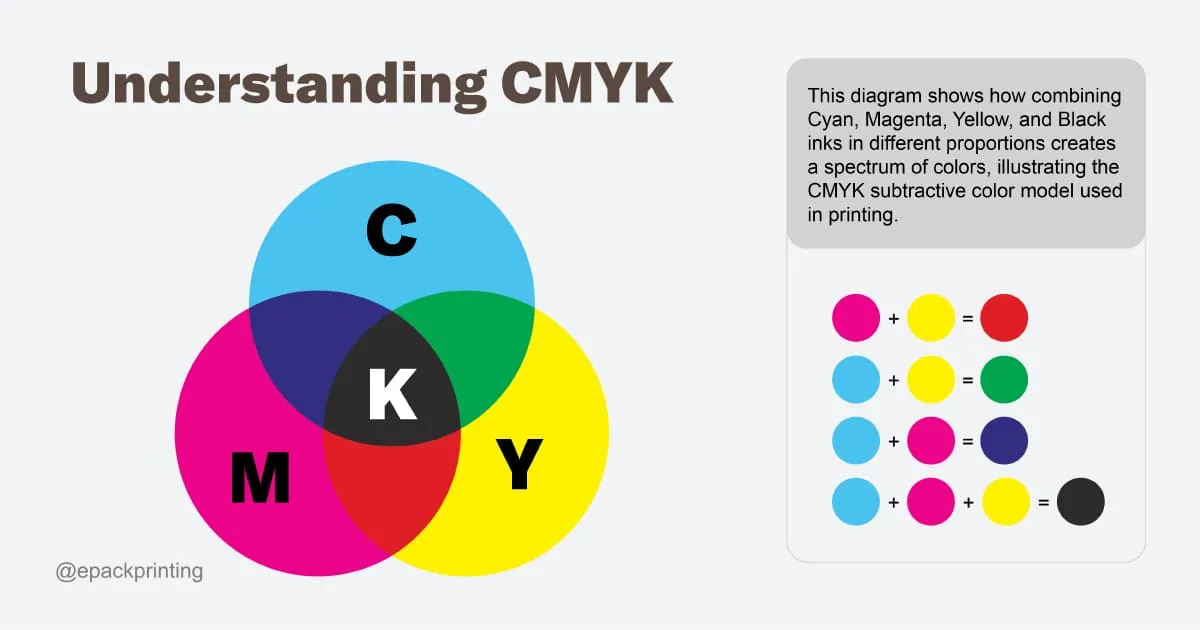


- Understanding CMYK concept https://www.epackprinting.com/support/understanding-cmyk/

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The old code had inefficiencies (like using loops) and incorrect channel handling. The new version uses vectorized operations for performance and correct CMYK conversion formulas.

### Key Improvements:<br>
**Vectorized Operations:** Replaced slow Python loops with efficient NumPy array operations.<br>

Correct CMYK Conversion:<br>

- K = min(C, M, Y) (Black component is minimum of CMY)

- Adjusted CMY: (C - K)/(1 - K) (with safeguards for division by zero)

**Channel Handling:**<br>

- Proper handling of OpenCV's BGR format

- Direct channel extraction instead of manual indexing

**Visualization:**<br>

- Inverted plate display (black = ink, white = no ink)

- Grayscale representation of each CMYK channel

**Numerical Stability:**<br>

- Added epsilon value to prevent division by zero.  
- Avoids underflow errors when working with very small values in computations.
- Prevents division by near-zero values, which could result in extreme values or NaN issues. 
- Proper normalization and data type handling.
- Improves numerical stability in algorithms like machine learning, optimization, and image processing.

**Notes:**<br>
- The CMYK image is a 4-channel float array (values 0-1)

- Plates are shown inverted for intuitive printing view

- Requires opencv-python, numpy, and matplotlib packages

- Original image should be in the same directory as the script ("bird.jpg")

# RGB to CMYK on Image as an input

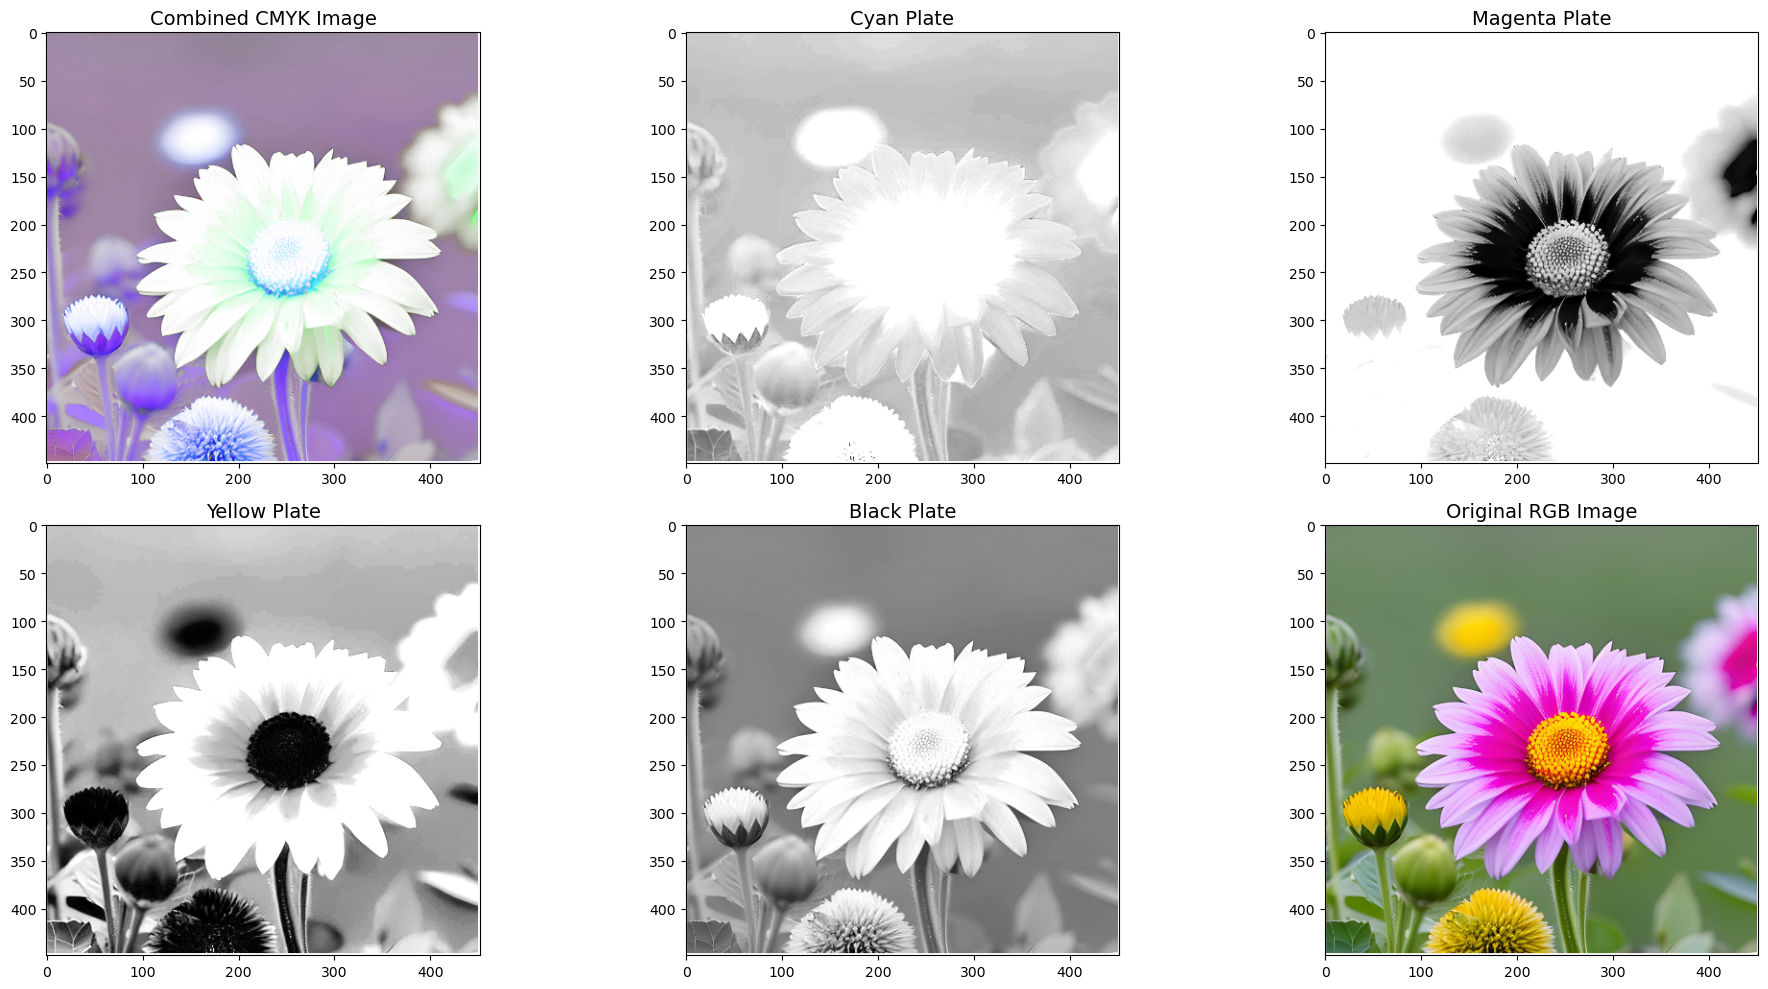

In [13]:
# Load image
img_bgr = cv2.imread("flower.png")  # Image loaded in BGR format

# Convert to float and normalize to [0, 1]
img_normalized = img_bgr.astype(np.float32) / 255.0

# Split into B, G, R channels (OpenCV uses BGR)
B, G, R = cv2.split(img_normalized)

# Calculate CMY components
C = 1 - R
M = 1 - G
Y = 1 - B

# Calculate K (black) component
K = np.minimum(np.minimum(C, M), Y) # or more optimized K = np.minimum.reduce([C, M, Y]) --->Finds the minimum across all elements in the list at once.

# Avoid division by zero for neutral pixels
epsilon = 1e-6  # Small value to prevent division by zero
scale = 1.0 - K
scale[scale < epsilon] = epsilon  # Replace zeros with epsilon

# Calculate adjusted CMY components
C_adjusted = (C - K) / scale
M_adjusted = (M - K) / scale
Y_adjusted = (Y - K) / scale

# Combine into CMYK image (4 channels)
cmyk = cv2.merge([C_adjusted, M_adjusted, Y_adjusted, K])

# Visualization: Create inverted plates for printing view
# (White = no ink, Black = full ink)
cyan_plate = (1 - C_adjusted) * 255
magenta_plate = (1 - M_adjusted) * 255
yellow_plate = (1 - Y_adjusted) * 255
black_plate = (1 - K) * 255

# Convert to uint8 for display
cyan_plate = cyan_plate.astype(np.uint8)
magenta_plate = magenta_plate.astype(np.uint8)
yellow_plate = yellow_plate.astype(np.uint8)
black_plate = black_plate.astype(np.uint8)

# Plot results
plt.figure(figsize=(20, 10))

# Combined CMYK Image
plt.subplot(2, 3, 1)
plt.title("Combined CMYK Image", fontsize=14)
plt.imshow(cmyk)

# CMYK Plates
plt.subplot(2, 3, 2)
plt.title("Cyan Plate", fontsize=14)
plt.imshow(cyan_plate, cmap='gray') # 

plt.subplot(2, 3, 3)
plt.title("Magenta Plate", fontsize=14)
plt.imshow(magenta_plate, cmap='gray') # 

plt.subplot(2, 3, 4)
plt.title("Yellow Plate", fontsize=14)
plt.imshow(yellow_plate, cmap='gray') #, cmap='gray'

plt.subplot(2, 3, 5)
plt.title("Black Plate", fontsize=14)
plt.imshow(black_plate, cmap='gray') #, cmap='gray'

# Original RGB Image
plt.subplot(2, 3, 6)
plt.title("Original RGB Image", fontsize=14)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

# CMYK to RGB Conversion function

In [18]:
def cmyk_to_rgb(c, m, y, k, scale=1.0):
    """
    Convert CMYK color values to RGB.
    
    Args:
        c, m, y, k: CMYK color values (default range [0, 1])
        scale: Scaling factor for CMYK inputs. Use 1.0 for [0, 1] and 100.0 for [0, 100].
    
    Returns:
        tuple: (r, g, b) integers in the range [0, 255]
    """
    # Scale CMYK values to [0, 1]
    c = max(0.0, min(1.0, c / scale))
    m = max(0.0, min(1.0, m / scale))
    y = max(0.0, min(1.0, y / scale))
    k = max(0.0, min(1.0, k / scale))
    
    # Convert CMYK to RGB
    r = 255.0 * (1.0 - c) * (1.0 - k)
    g = 255.0 * (1.0 - m) * (1.0 - k)
    b = 255.0 * (1.0 - y) * (1.0 - k)
    
    # Round and clamp to [0, 255]
    r = min(255, max(0, round(r)))
    g = min(255, max(0, round(g)))
    b = min(255, max(0, round(b)))
    
    return (int(r), int(g), int(b))

# CMYK to RGB Conversion Visualization and Output verification

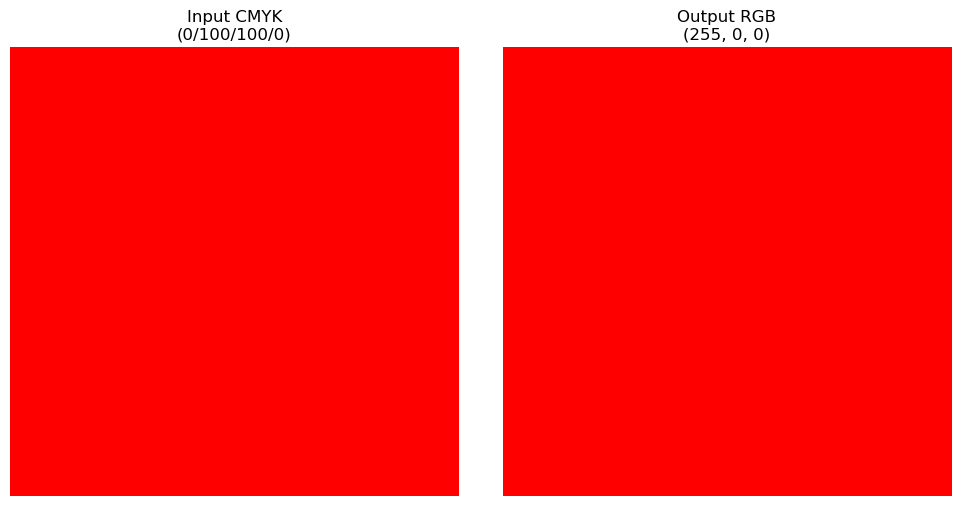

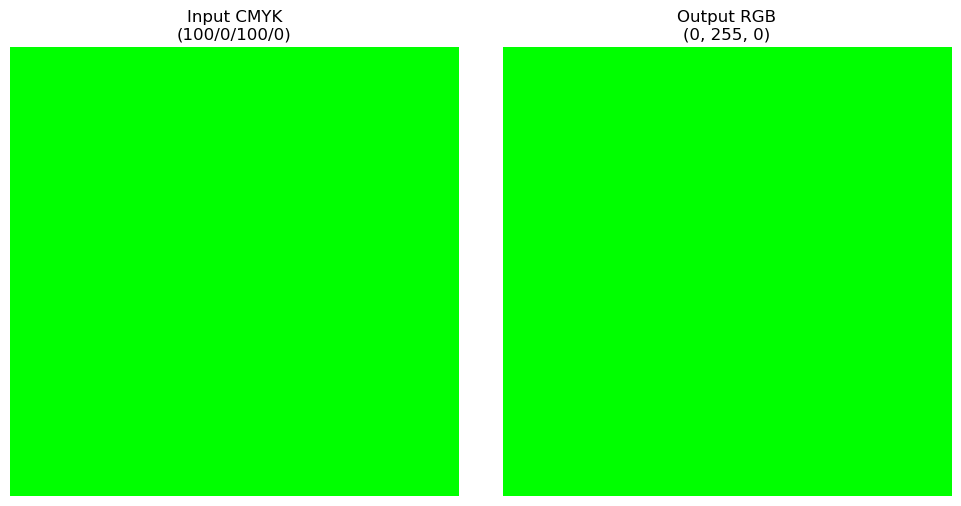

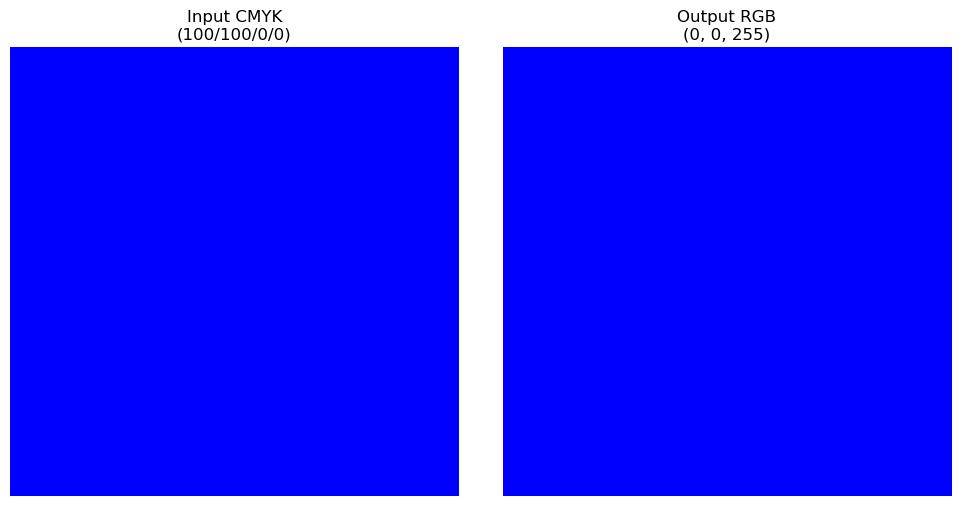

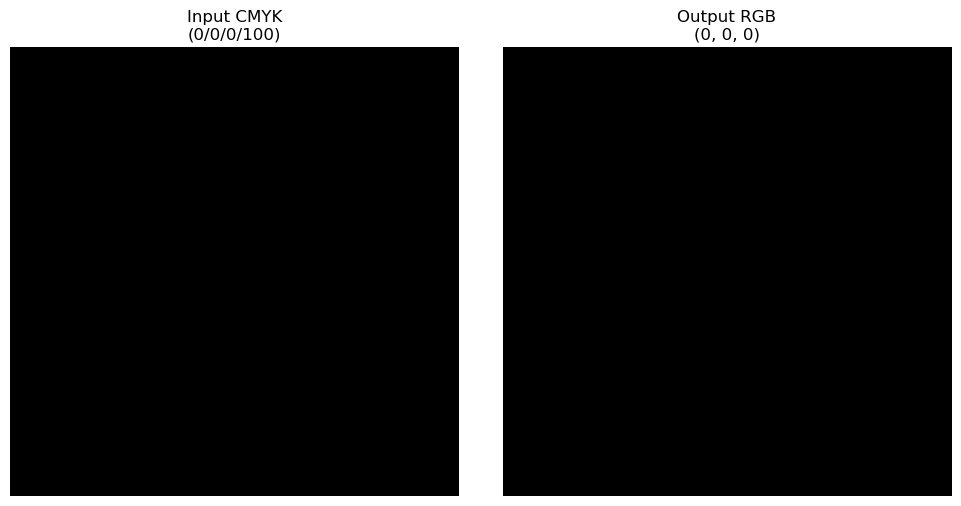

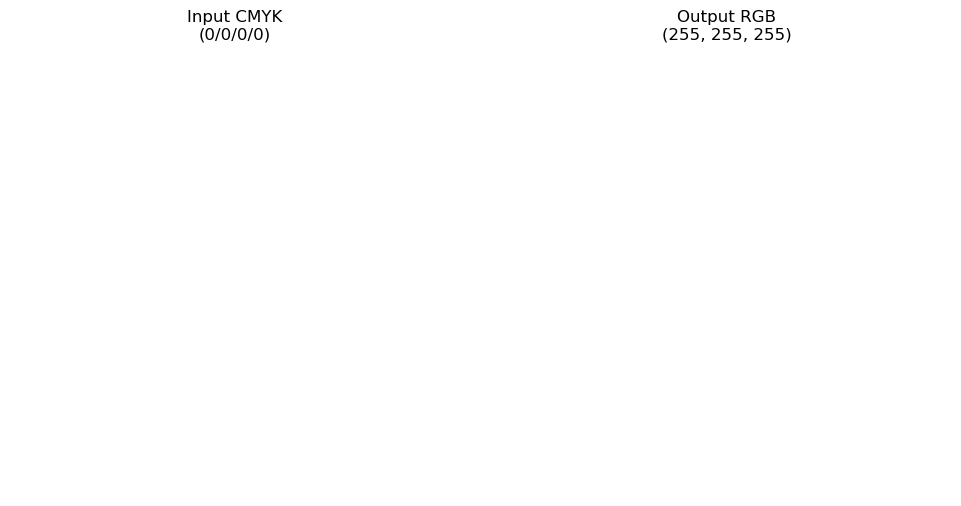

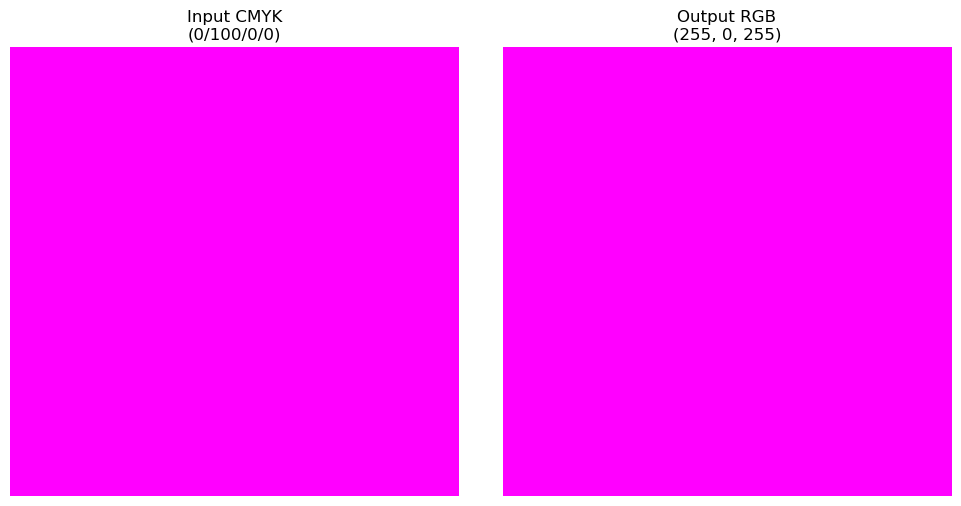

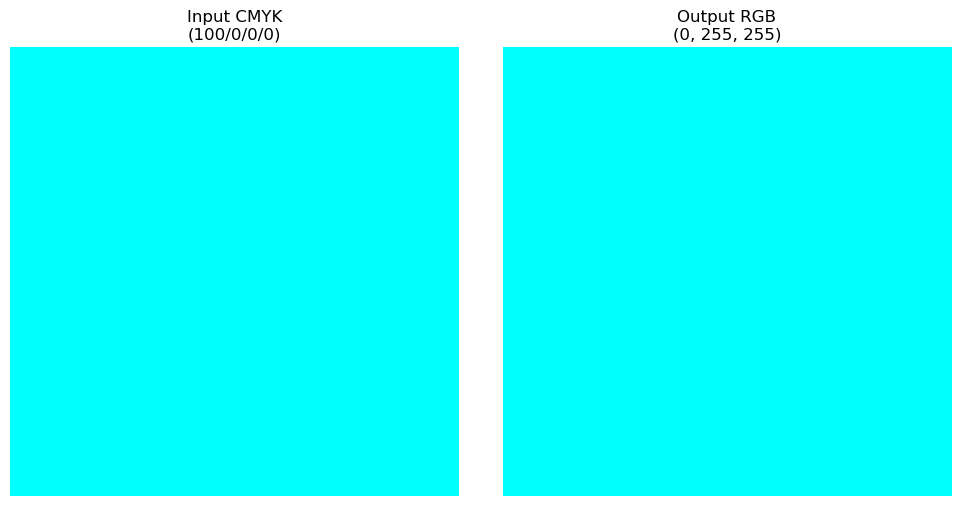

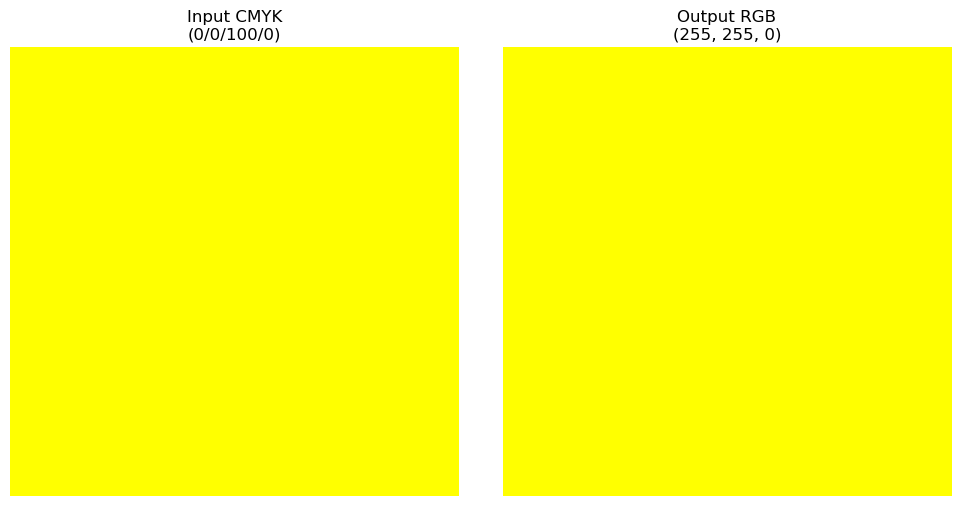

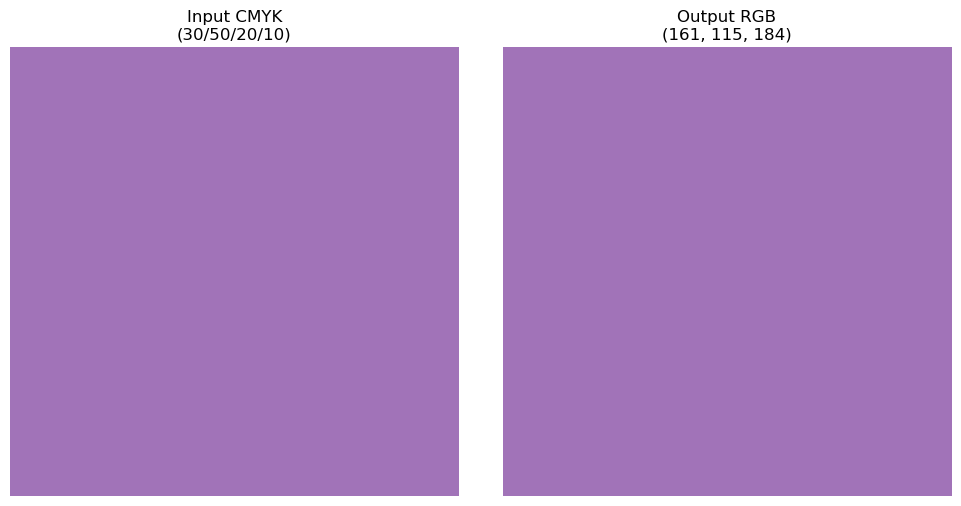

In [16]:
import matplotlib.pyplot as plt

def visualize_cmyk_to_rgb(c, m, y, k, scale=100.0):
    # Convert CMYK to RGB
    rgb = cmyk_to_rgb(c, m, y, k, scale)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display CMYK approximation (converted to RGB for display)
    cmyk_display = cmyk_to_rgb(c, m, y, k, scale)
    ax1.imshow([[cmyk_display]])
    ax1.set_title(f'Input CMYK\n({c}/{m}/{y}/{k})')
    ax1.axis('off')
    
    # Display RGB result
    ax2.imshow([[(rgb[0]/255, rgb[1]/255, rgb[2]/255)]])
    ax2.set_title(f'Output RGB\n{rgb}')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# Test with various colors
visualize_cmyk_to_rgb(0, 100, 100, 0)     # Red
visualize_cmyk_to_rgb(100, 0, 100, 0)      # Green
visualize_cmyk_to_rgb(100, 100, 0, 0)      # Blue
visualize_cmyk_to_rgb(0, 0, 0, 100)        # Black
visualize_cmyk_to_rgb(0, 0, 0, 0)          # White
visualize_cmyk_to_rgb(0, 100, 0, 0)        # Cyan
visualize_cmyk_to_rgb(100, 0, 0, 0)        # Magenta
visualize_cmyk_to_rgb(0, 0, 100, 0)        # Yellow
visualize_cmyk_to_rgb(30, 50, 20, 10)      # Custom color

### Important Notes: (For educational purpose)
- The visualization shows CMYK colors converted to RGB for display purposes only (since screens can't show true CMYK).<br>

- Perfect color matching depends on color profiles and rendering engines.<br>

- For professional use, verify with color-managed software like Photoshop.<br>

- The simple conversion formula works best for standard color ranges.<br>

# Alternative Verification Methods:

Compare with online converters:

python Example: https://www.rapidtables.com/convert/color/cmyk-to-rgb.html




In [19]:
print("CMYK (0,100,100,0) ->", cmyk_to_rgb(0,100,100,0,100))  # Should be (255,0,0)

CMYK (0,100,100,0) -> (255, 0, 0)


# Unit tests:

In [20]:
def test_conversion():
    assert cmyk_to_rgb(0, 100, 100, 0, 100) == (255, 0, 0)    # Red
    assert cmyk_to_rgb(100, 0, 100, 0, 100) == (0, 255, 0)     # Green
    assert cmyk_to_rgb(0, 0, 0, 100, 100) == (0, 0, 0)         # Black
    assert cmyk_to_rgb(0, 0, 0, 0, 100) == (255, 255, 255)    # White
    print("All tests passed!") 

# Why No Output Above?
- Assertions (assert) do not print anything if the conditions are met.<br>
- Since all assertions pass successfully, Python moves through the function silently.<br>
- The print("All tests passed!") statement will only execute if the function is explicitly called.<br>

**such as:** test_conversion() ---> see below


In [23]:
def test_conversion():
    print("Testing CMYK to RGB Conversion...")
    
    assert cmyk_to_rgb(0, 100, 100, 0, 100) == (255, 0, 0)   # Red
    print("✅ Red passed!")

    assert cmyk_to_rgb(100, 0, 100, 0, 100) == (0, 255, 0)   # Green
    print("✅ Green passed!")

    assert cmyk_to_rgb(0, 0, 0, 100, 100) == (0, 0, 0)       # Black
    print("✅ Black passed!")

    assert cmyk_to_rgb(0, 0, 0, 0, 100) == (255, 255, 255)   # White
    print("✅ White passed!")

    print("🎉 All tests passed!")

test_conversion()

Testing CMYK to RGB Conversion...
✅ Red passed!
✅ Green passed!
✅ Black passed!
✅ White passed!
🎉 All tests passed!


# This is the old code with errors and loops (Kept this to analyse errors of my first attempt)

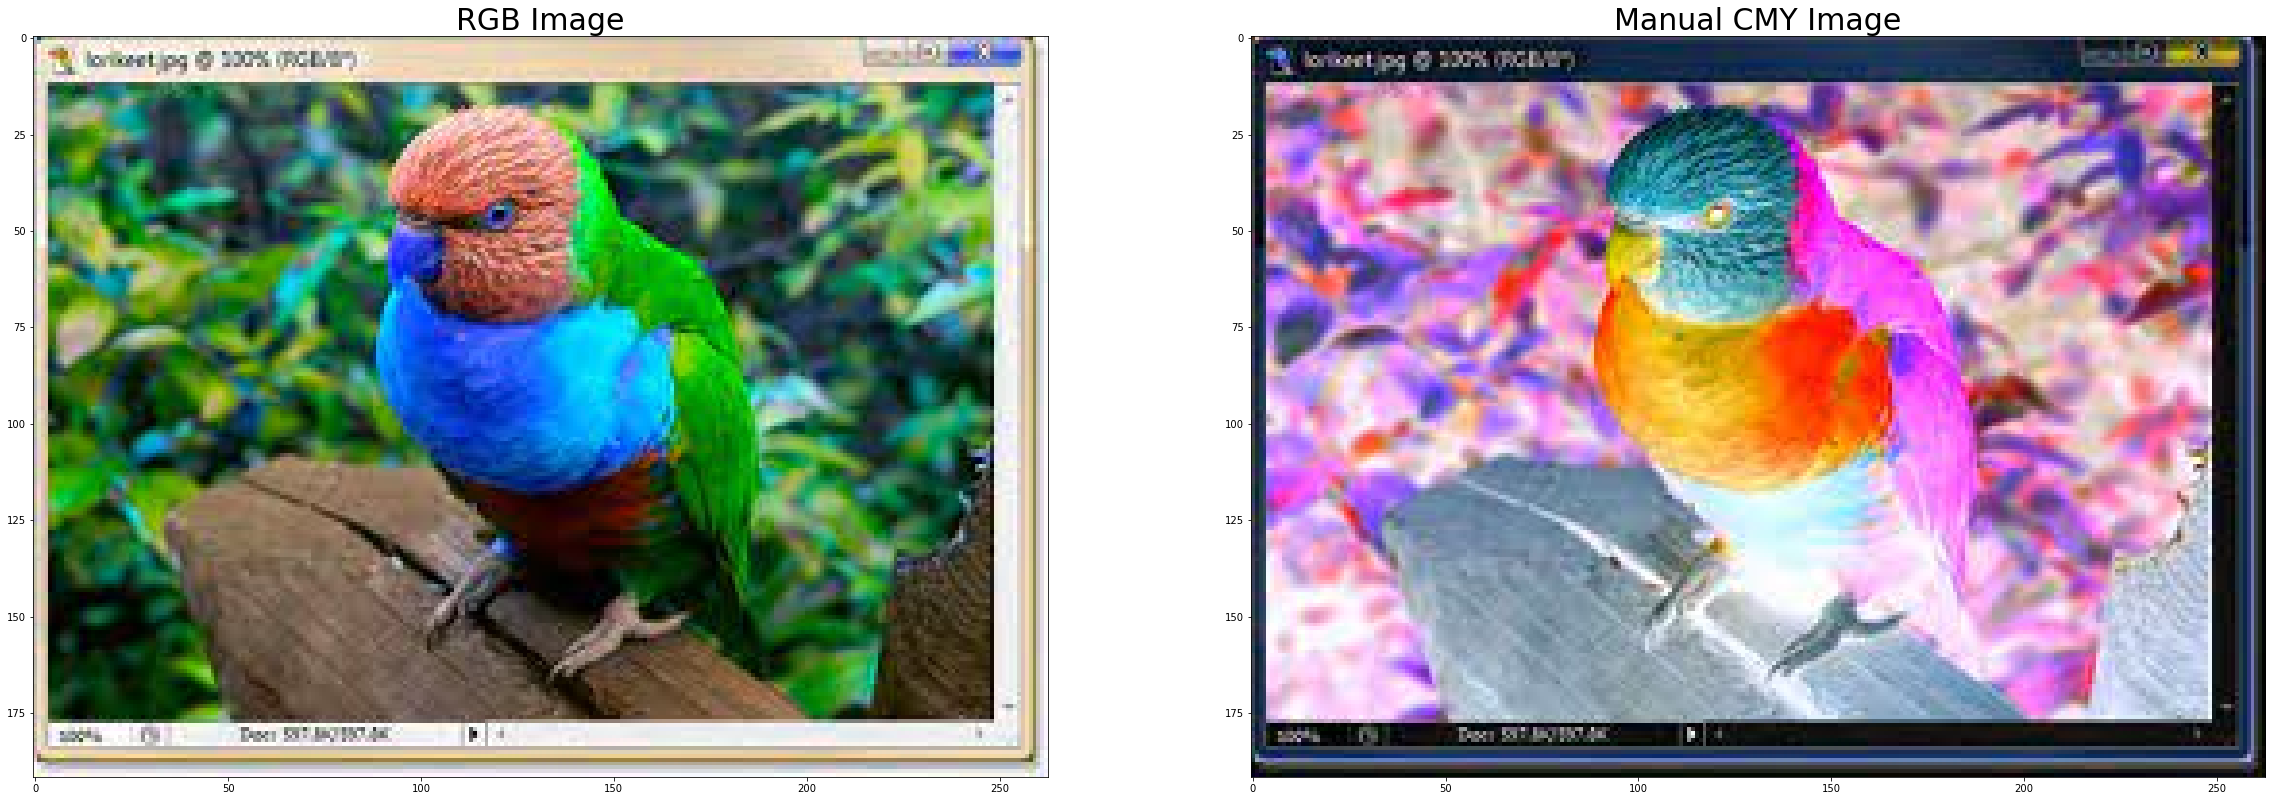

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Image
img_rgb = cv.imread("bird.jpg")

# RGB to CMY conversion formula
# C = 1 - R
# M = 1 - G
# Y = 1 - B

# splitting the color channels of the image  and then normalizing
r, g, b = img_rgb[:,:,2], img_rgb[:,:,1], img_rgb[:,:,0]
R, G, B = r/ 255.0 , g/255.0, b/255.0

# create a dummy matrix with all values 0
cmy = img_rgb.copy()
cmy[:,:,:] = [0, 0 ,0]

# iterating through the image height and width
for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
        
        # Merge the final output to dummy matrix
        cmy[i,j,0] = 255 - img_rgb[i,j,2]
        cmy[i,j,1] = 255 - img_rgb[i,j,1]
        cmy[i,j,2] = 255 - img_rgb[i,j,0]
        
# plotting the results on grid
fig, axs = plt.subplots(2, 2, figsize = (40, 40))

plt.subplot(1, 2, 1)
plt.title("RGB Image", fontsize = 30)
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.title("Manual CMY Image", fontsize = 30)
plt.imshow(cv.cvtColor(cmy, cv.COLOR_BGR2RGB))


In [3]:
# using opencv imshow to display output
cv.imshow('CMY by loop',cmy)
cv.waitKey(0)
cv.destroyAllWindows()